In [35]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from scipy import stats
import gower
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import random
import umap as umap


def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../app/data/portfolio1_ETL.csv'
portfolio1_ID = load_data(filepath)

portfolio1 = portfolio1_ID.drop(columns=['id'])
portfolio1.head()

,idade_empresa_anos,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",...,setor_INDUSTRIA,setor_SERVIÇO,setor_nan,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
0,0.65,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,20.86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,18.73,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
#list of non bolean columns taken from the market database
non_bolean_cols = ['idade_empresa_anos',
 'idade_maxima_socios',
 'idade_media_socios',
 'idade_minima_socios',
 'qt_filiais',
 'qt_socios',
 'qt_socios_st_regular']

In [37]:
def min_max_col(df_transform,cols):
    '''
    Input 
    Takes in a dataframe and a column being a continuous feature to normalize (min =0, and max =1)
    
    Output
    New dataframe with the column passed normalized
    '''
    mmsc = MinMaxScaler()
    for col in cols:
        var_cont = df_transform.loc[:,col].values.reshape(-1,1)
        var_cont_standarized = mmsc.fit_transform(var_cont)
        df_transform.loc[:,col] = var_cont_standarized
    return df_transform;



#Keeping the same rule applied to the market, which is normalization over standarization in iteration 0
portfolio1 = min_max_col(portfolio1,non_bolean_cols)
portfolio1[non_bolean_cols]

,idade_empresa_anos,idade_maxima_socios,idade_media_socios,idade_minima_socios,qt_filiais,qt_socios,qt_socios_st_regular
0,0.012640,0.486486,0.513514,0.527027,0.000000,0.000,0.0
1,0.137771,0.459459,0.472973,0.459459,0.033898,0.000,0.0
2,0.167685,0.608108,0.635135,0.648649,0.000000,0.000,0.0
3,0.438382,0.418919,0.445946,0.459459,0.000000,0.000,0.0
4,0.393512,0.324324,0.351351,0.364865,0.025424,0.125,0.0
...,...,...,...,...,...,...,...
550,0.581631,0.445946,0.459459,0.459459,0.000000,0.000,0.0
551,0.032652,0.418919,0.445946,0.459459,0.000000,0.000,0.0
552,0.670318,0.445946,0.459459,0.459459,0.000000,0.000,0.0
553,0.019381,0.337838,0.364865,0.378378,0.000000,0.000,0.0


In [38]:
dissimilarity_matrix = gower.gower_matrix(portfolio1)
dissimilarity_matrix.shape, dissimilarity_matrix

((555, 555),
 array([[0.        , 0.07231862, 0.07364653, ..., 0.05188142, 0.04383934,
         0.05923741],
        [0.07231862, 0.        , 0.05037536, ..., 0.05054983, 0.06743   ,
         0.04837532],
        [0.07364653, 0.05037536, 0.        , ..., 0.05311565, 0.07034773,
         0.03793853],
        ...,
        [0.05188142, 0.05054983, 0.05311565, ..., 0.        , 0.07020424,
         0.03970283],
        [0.04383934, 0.06743   , 0.07034773, ..., 0.07020424, 0.        ,
         0.07946803],
        [0.05923741, 0.04837532, 0.03793853, ..., 0.03970283, 0.07946803,
         0.        ]], dtype=float32))

In [75]:
teste = dissimilarity_matrix[0:10]
new = []
for i in range(0,10):
    new.append(teste[i][0:10])
pd.DataFrame(np.concatenate(new)).to_csv('teste.csv')

In [39]:
# set random initial medoids
initial_medoids = [50, 200, 450]
# create K-Medoids algorithm for processing distance matrix instead of points
kmedoids_instance = kmedoids(dissimilarity_matrix, initial_medoids, data_type='distance_matrix')
# run cluster analysis and obtain results
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()

medoids = kmedoids_instance.get_medoids()

medoids

[162, 305, 530]

In [40]:
kmedoids_instance.get_cluster_encoding()

<type_encoding.CLUSTER_INDEX_LIST_SEPARATION: 1>

In [41]:
len(clusters[0]), len(clusters[1]), len(clusters[2])

(338, 108, 109)

In [42]:
labels = pd.Series(0,index=range(0,portfolio1.shape[0]))
for i in range (0,len(clusters)):
    for n in range (0,len(clusters[i])):
        index = clusters[i][n]
        labels.iloc[index] = i

labels.value_counts()

0    338
2    109
1    108
dtype: int64

In [43]:
silhouette_score(dissimilarity_matrix, labels, metric='precomputed', sample_size=None, random_state=42)

0.15793464

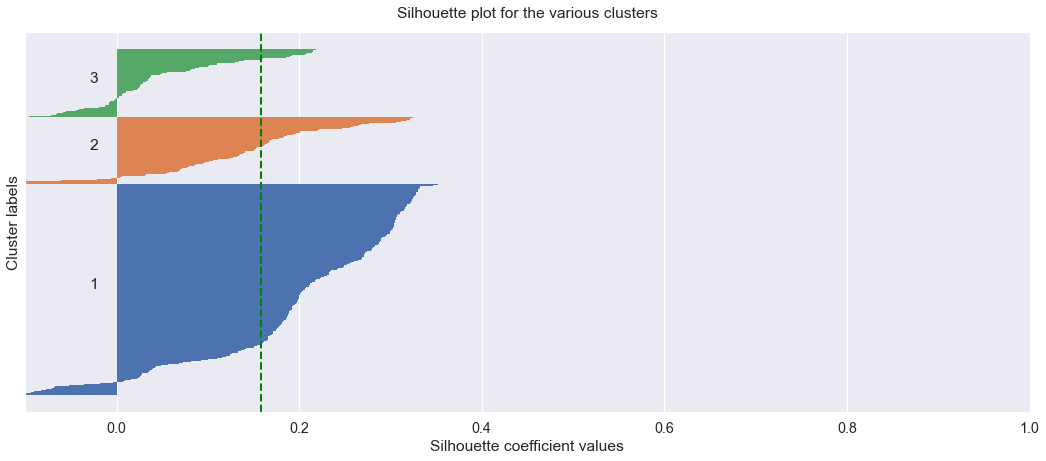

In [44]:
X = dissimilarity_matrix

# Get silhouette samples
silhouette_vals = silhouette_samples(X, labels,metric='precomputed')
# Silhouette plot
fig, (ax1) = plt.subplots(1)
fig.set_size_inches(18, 7)
    
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

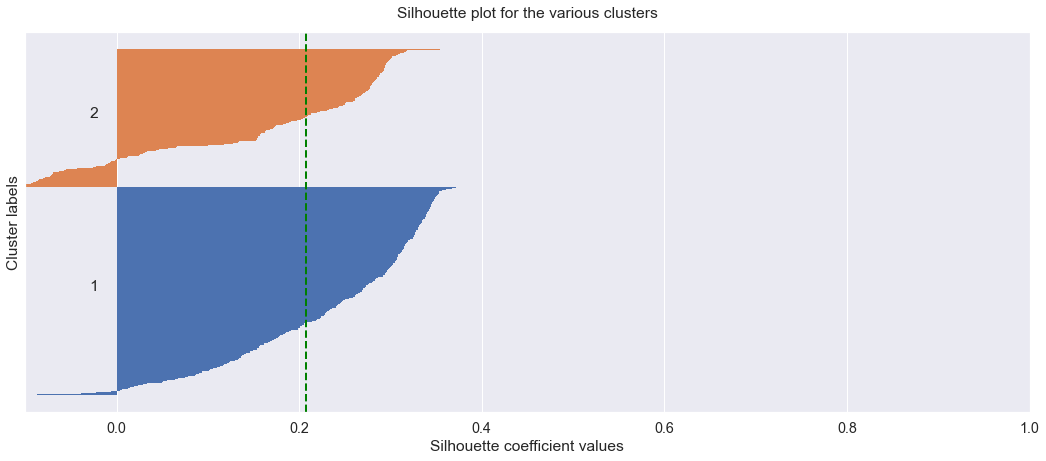

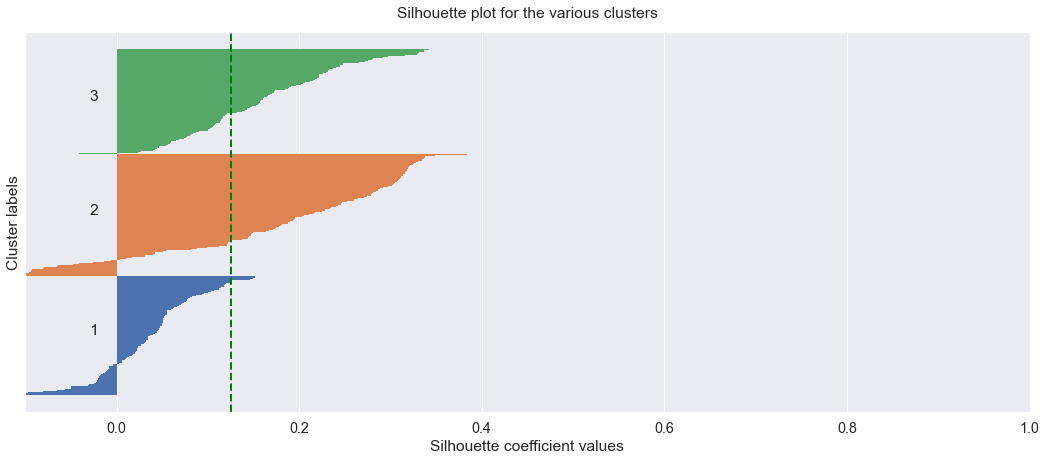

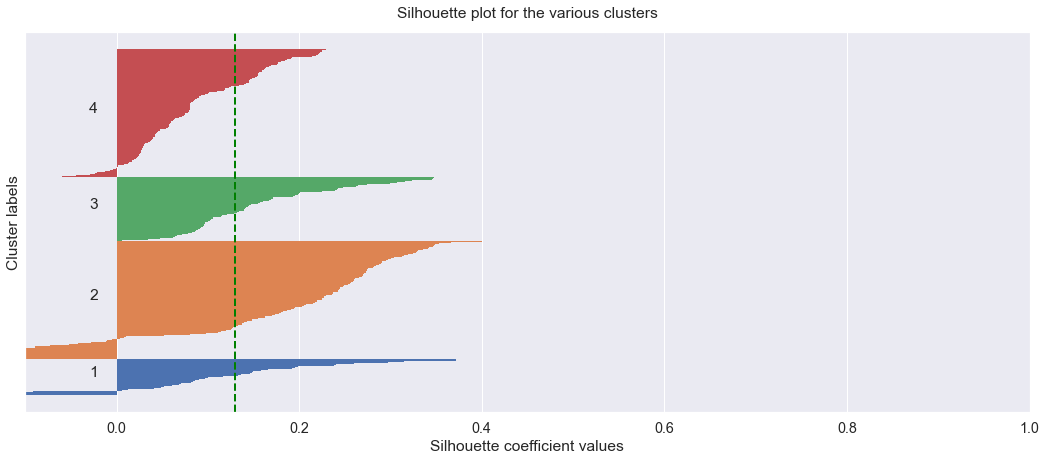

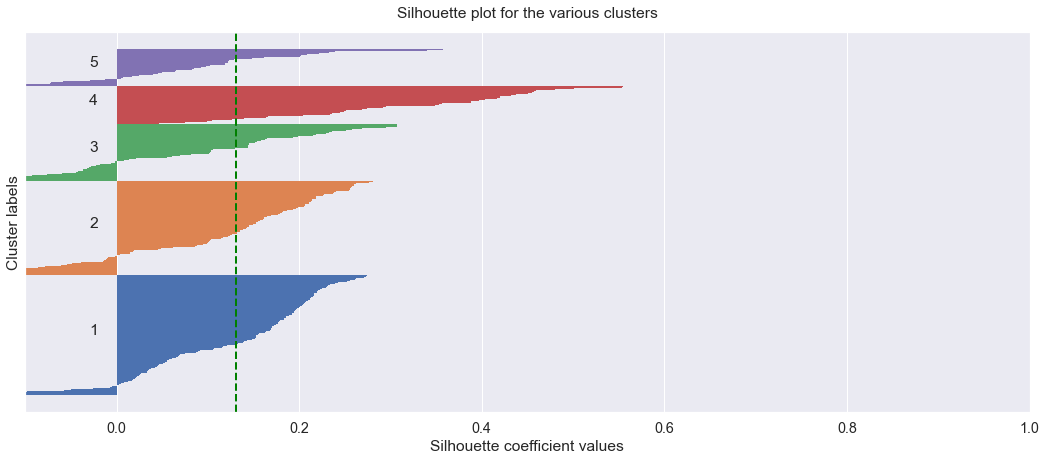

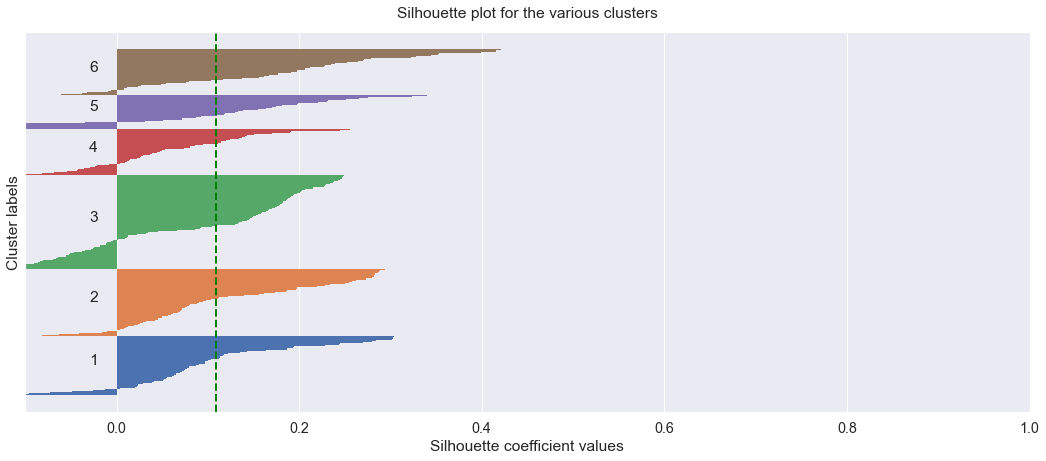

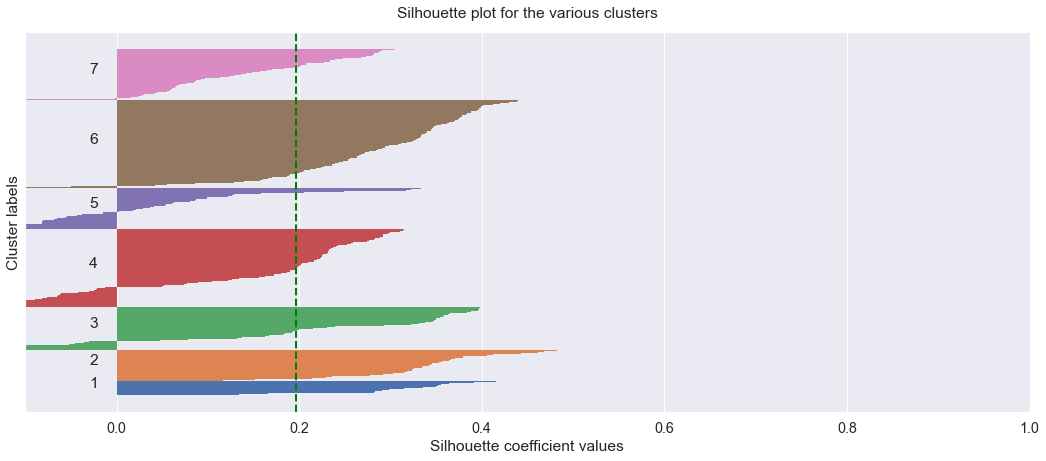

In [45]:
medoids_per_k = []
k_scores = []
wss = []
random.seed(42)
for i, k in enumerate([2, 3, 4, 5, 6, 7]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    initial_medoids_km = random.sample(range(1, portfolio1.shape[0]), k)
    # Run the Kmeans algorithm
    km = kmedoids(dissimilarity_matrix, initial_medoids_km, data_type='distance_matrix')
    km.process()
    #centroids = kmedoids_instance.get_medoids()
    clusters_km = km.get_clusters()
    medoids_km = km.get_medoids()
    medoids_per_k.append(medoids_km)
    labels_km = pd.Series(0,index=range(0,portfolio1.shape[0]))
    for i in range (0,len(clusters_km)):
        for n in range (0,len(clusters_km[i])):
            index = clusters_km[i][n]
            labels_km.iloc[index] = i
    
    clusters_distances = []
    for n in range (0,len(clusters_km)):
        clusters_distances.append(X[medoids_km[n]][labels_km[labels_km == n].index].sum())
    
    wss.append(sum(clusters_distances))

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels_km,metric='precomputed')

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels_km)):
        cluster_silhouette_vals = silhouette_vals[labels_km == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    
    avg_score = np.mean(silhouette_vals)
    k_scores.append(avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
   

In [46]:
k_scores

[0.20720947, 0.1256608, 0.13019678, 0.1303664, 0.10873839, 0.19608669]

In [47]:
wss

[21.801112174987793,
 20.024869441986084,
 19.602880001068115,
 18.777981877326965,
 18.328969955444336,
 17.304361164569855]

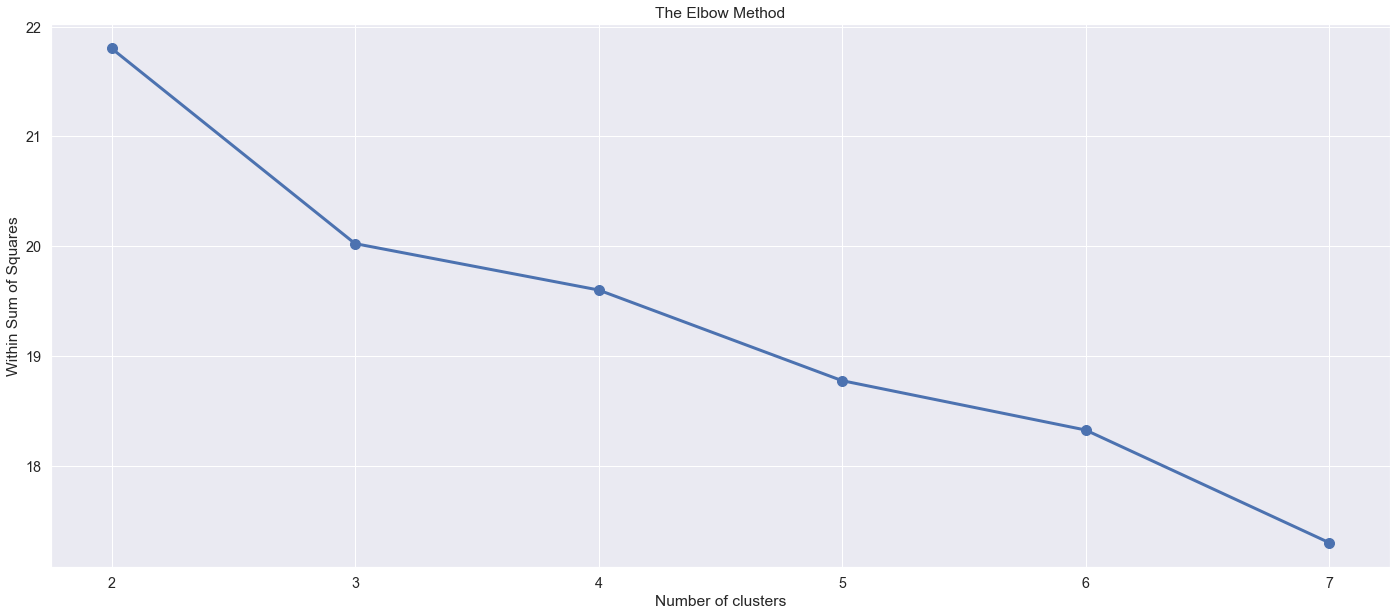

In [48]:
sns.set(font_scale = 1.3)

plt.figure(figsize=(24,10))
plt.plot(list(range(2, 8)), wss,marker='o', linewidth=3, markersize=10)

plt.title('The Elbow Method') 
plt.xlabel("Number of clusters")
plt.ylabel("Within Sum of Squares")

plt.show()

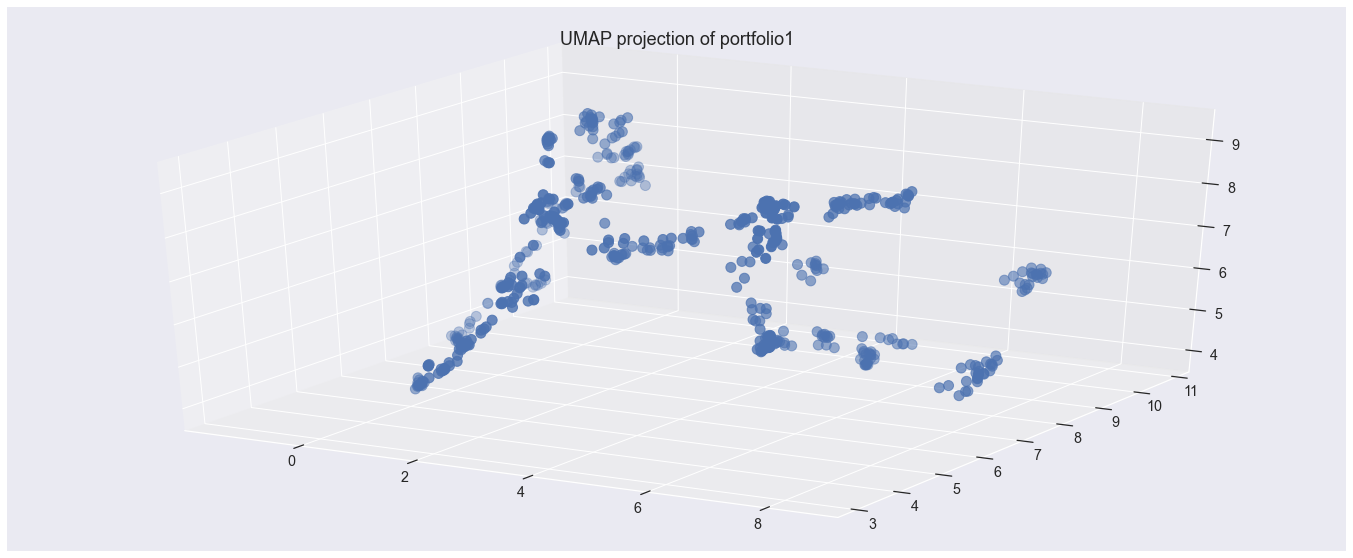

In [49]:
def draw_umap(data, n_neighbors, min_dist, n_components, title, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric,
        random_state = 42
    )
    u = fit.fit_transform(data);
    fig = plt.figure(figsize=(24,10))
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)
    
title = 'UMAP projection of portfolio1'    
draw_umap(portfolio1,14,0.1,3,title)

In [50]:
'''This visualization is merily to generate a plot to show how are our clusters distributed.
UMAP doesn't have the gower distance in-built, but it supports custom distances, 
so a function had to be written to show how it actually behaved with the distance used to build the clusters.
Instead we'll look at the plot with the manhattan and dice distances which are the distances used in the gower distance.'''

fit = umap.UMAP(n_neighbors=14,min_dist=0.1,n_components=3,metric='dice', random_state=42)
p1_umap = fit.fit_transform(portfolio1)

# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=p1_umap[clusters[0], 0], y=p1_umap[clusters[0], 1], z=p1_umap[clusters[0], 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=p1_umap[clusters[1], 0], y=p1_umap[clusters[1], 1], z=p1_umap[clusters[1], 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=p1_umap[clusters[2], 0], y=p1_umap[clusters[2], 1], z=p1_umap[clusters[2], 2], name='Cluster 3', mode='markers'))
#fig.add_trace(go.Scatter3d(x=p1_umap[clusters[3], 0], y=p1_umap[clusters[3], 1], z=p1_umap[clusters[3], 2], name='Cluster 4', mode='markers'))
#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=p1_umap[medoids,0], y=p1_umap[medoids,1],z=p1_umap[medoids,2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters with the Dice Distance')

fig.show()

c:\users\ricardo_2\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1528: UserWarning:

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable



In [51]:
fit = umap.UMAP(n_neighbors=14,min_dist=0.1,n_components=3,metric='manhattan', random_state=42)
p1_umap = fit.fit_transform(portfolio1)

# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=p1_umap[clusters[0], 0], y=p1_umap[clusters[0], 1], z=p1_umap[clusters[0], 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=p1_umap[clusters[1], 0], y=p1_umap[clusters[1], 1], z=p1_umap[clusters[1], 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=p1_umap[clusters[2], 0], y=p1_umap[clusters[2], 1], z=p1_umap[clusters[2], 2], name='Cluster 3', mode='markers'))
#fig.add_trace(go.Scatter3d(x=p1_umap[clusters[3], 0], y=p1_umap[clusters[3], 1], z=p1_umap[clusters[3], 2], name='Cluster 4', mode='markers'))
#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=p1_umap[medoids,0], y=p1_umap[medoids,1],z=p1_umap[medoids,2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters with the Manhattan Distance')

fig.show()